In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**quandl**

qunadl is a famous library that is used for fetching the data related to economic or financial problems. it is used to get the historical data of stocks.

this particular problem can be solve it using knn/linear regression/lstm time series thing





In [ ]:
!pip install quandl --quiet

In [ ]:
import quandl
data = quandl.get("NSE/TATAGLOBAL") #considering tata global data

In [ ]:
print(data.shape) #to get the number of entries

(2100, 7)


In [ ]:
data.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98
2010-07-28,118.0,120.50,117.20,118.15,118.25,835593.0,994.01
2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134.0,2791.03
2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191.0,3112.68
2010-08-02,117.3,118.50,116.60,118.10,117.30,663593.0,779.85


Process of execution in data preprocessing (method 1)

**1. Data Preprocessing**
Data preprocessing involves preparing raw data for analysis by applying various techniques to clean, transform, and enhance the data. The goal is to make the data suitable for modeling and to improve the performance of machine learning algorithms.

**2. Percentage Change Calculation**
Percentage change calculation is a way to quantify the change in stock prices over time, expressed as a percentage. It helps to understand the day-to-day volatility in stock prices.


**Why Calculate Percentage Change?**

Captures Day-to-Day Volatility: By looking at percentage changes, you can observe how much the stock price fluctuates on a daily basis, which is crucial in financial markets where price volatility is a key factor.

Identifying Significant Movements: The percentage change helps in identifying days with significant price movements, which are often the most important for predicting future trends.

**3. Identifying Significant Daily Percentage Change**

Significant Daily Percentage Change: A significant change is defined as a movement greater than 5% (though this threshold can vary depending on the analysis). This means if the stock price increases or decreases by more than 5% compared to the previous day, it is considered a significant movement.


Why Use a Threshold of 5%?
High Volatility Days: Days with more than a 5% change are often associated with events or news that strongly influence the stock's price. These are critical to identifying because they might predict future trends or reversals in the market.

**4. Lag Features**

Lag features are created by shifting data points from previous time steps (days, in this case) to the current time step. In financial markets, lag features help capture temporal dependencies, which are crucial for time-series forecasting.

How are Lag Features Created?

Shifting the Indicator: For example, if you are tracking a significant movement (like the 5% threshold), you might want to know if a similar movement occurred in the past few days. You create a lag feature by shifting the significant movement indicator back by 1, 2, 3, 4, and 5 days.


Lag 1: Did a significant movement happen yesterday?

Lag 2: Did a significant movement happen two days ago?

Lag 3: Did a significant movement happen three days ago?

And so on.

Temporal Dependencies: These lag features help the model understand the temporal patterns and dependencies in the data. For instance, if significant movements tend to cluster (e.g., a significant rise one day is followed by another the next day), these lag features will help the model capture that pattern.


Why are Lag Features Important?

Time-Series Forecasting:
 Financial markets are influenced by historical events. Lag features allow models to incorporate past information to predict future prices.


Improved Predictive Power:
 By including lag features, you give the model access to past significant movements, which can be highly predictive of future trends.


In [ ]:
# here we are going to predict the stock price by fetching the data from yahoo finance api
#data collection
import pandas_datareader as pdr

pandas_datareader is imported to fetch stock market data. go to the website called tiingo

In [ ]:
key="8d1289fa75c1db942ae4fd2fe524c04ee6243770"

In [ ]:
import yfinance as yf

# Fetch Apple's stock data
df = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
#this will fetch all the data from 2020-1-1 up to 2023-1-1
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876106,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167603,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742661,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200


In [ ]:
df.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.631363,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,128.818405,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,124.865585,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.402328,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,128.719330,77034200


In [ ]:
df.to_csv('AAPL.csv') # convert the file content to csv

we have converted the fetched data into csv file.


In [ ]:
import pandas as pd
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876106,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167603,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742661,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200


In [ ]:
#here i was thinking to resett the index and extarct the closed prices of apples stocks which will be further used for analysis and modelling

df1 = df.reset_index()['Close']

vizulaizing the close prices(Before processing, the close prices are visualized to understand the trend)


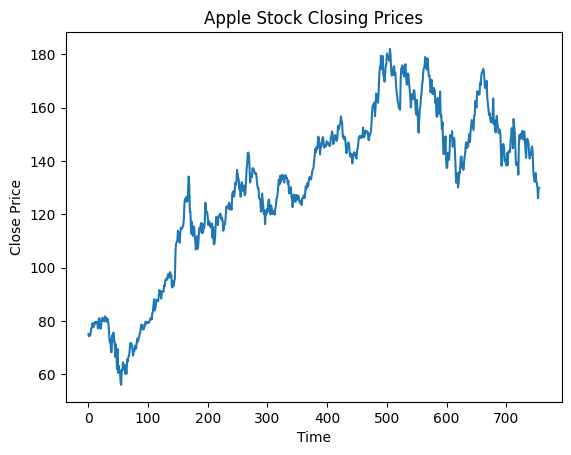

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.title("Apple Stock Closing Prices")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.show()

LSTM models are sensitive to the scale of the data, so the close prices are scaled to a range between 0 and 1 using MinMaxScaler.

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#apply this minmax scaler to scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
#Converts the series df1 (Apple stock close prices) into a 2D NumPy array with one column.
#Applies Min-Max scaling to normalize the data between 0 and 1, which is essential for training the LSTM model effectively.
print(df1)  # Scaled data

[[0.15085277]
 [0.14505529]
 [0.14976075]
 [0.14696135]
 [0.15649137]
 [0.16927753]
 [0.17066729]
 [0.18383068]
 [0.17533306]
 [0.17267259]
 [0.18041574]
 [0.18734493]
 [0.1830564 ]
 [0.18529994]
 [0.18833764]
 [0.18651102]
 [0.16792745]
 [0.18528007]
 [0.19848314]
 [0.19754999]
 [0.16903929]
 [0.16735166]
 [0.18758317]
 [0.19274529]
 [0.20021045]
 [0.18992596]
 [0.19294378]
 [0.18909205]
 [0.2041615 ]
 [0.19953542]
 [0.19969428]
 [0.18788097]
 [0.19705363]
 [0.190462  ]
 [0.17606765]
 [0.14654436]
 [0.12649154]
 [0.13556496]
 [0.09758373]
 [0.09726605]
 [0.14779519]
 [0.12895351]
 [0.15559791]
 [0.13610106]
 [0.12837772]
 [0.08299089]
 [0.12105149]
 [0.1013759 ]
 [0.04737229]
 [0.1064189 ]
 [0.03542004]
 [0.05656483]
 [0.04427503]
 [0.04052257]
 [0.00966905]
 [0.        ]
 [0.04469198]
 [0.0419918 ]
 [0.06764351]
 [0.04639945]
 [0.0604364 ]
 [0.05940397]
 [0.03283898]
 [0.04082037]
 [0.03383169]
 [0.07564478]
 [0.06960907]
 [0.08279233]
 [0.08660432]
 [0.09704768]
 [0.12444655]
 [0.11

Splitting the Data into Train and Test Sets

In [ ]:
#i will be diving the entire datset as 65% trian and 35%testing
training_size=int(len(df1)*0.65)
testing_size = len(df1)- training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

training_size,testing_size

(491, 265)

training_data


In [ ]:
train_data

array([[0.15085277],
       [0.14505529],
       [0.14976075],
       [0.14696135],
       [0.15649137],
       [0.16927753],
       [0.17066729],
       [0.18383068],
       [0.17533306],
       [0.17267259],
       [0.18041574],
       [0.18734493],
       [0.1830564 ],
       [0.18529994],
       [0.18833764],
       [0.18651102],
       [0.16792745],
       [0.18528007],
       [0.19848314],
       [0.19754999],
       [0.16903929],
       [0.16735166],
       [0.18758317],
       [0.19274529],
       [0.20021045],
       [0.18992596],
       [0.19294378],
       [0.18909205],
       [0.2041615 ],
       [0.19953542],
       [0.19969428],
       [0.18788097],
       [0.19705363],
       [0.190462  ],
       [0.17606765],
       [0.14654436],
       [0.12649154],
       [0.13556496],
       [0.09758373],
       [0.09726605],
       [0.14779519],
       [0.12895351],
       [0.15559791],
       [0.13610106],
       [0.12837772],
       [0.08299089],
       [0.12105149],
       [0.101

In [ ]:
#now comes the main part that is data preprocessing the data taht will be sendt to the models and for analaysis
#Creating the Dataset for the LSTM Model
import numpy as np

# Function to create datasets for LSTM model
def create_dataset(data, time_step):
    x, y = [], []
    for i in range(len(data) - time_step):
        x.append(data[i:i + time_step])      # Input sequence (e.g., 100 time steps)
        y.append(data[i + time_step])        # Target value (next time step)
    return np.array(x), np.array(y)

# Set the number of previous time steps to use for prediction
time_step = 100

# Create the training and testing datasets
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input data for LSTM model (samples, time steps, features)
X_train = X_train.reshape(-1, time_step, 1)
X_test = X_test.reshape(-1, time_step, 1)

# Print the shapes of the datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (391, 100, 1), y_train shape: (391, 1)
X_test shape: (165, 100, 1), y_test shape: (165, 1)


Explanation:

create_dataset(data, time_step):
This function creates sequences of time_step length from the data to be used for training/testing the LSTM.

reshape(-1, time_step, 1):
 Reshapes the data to have three dimensions required by the LSTM: [samples, time steps, features].

Printing shapes: Shows the dimensions of the training and testing datasets.


vizualization

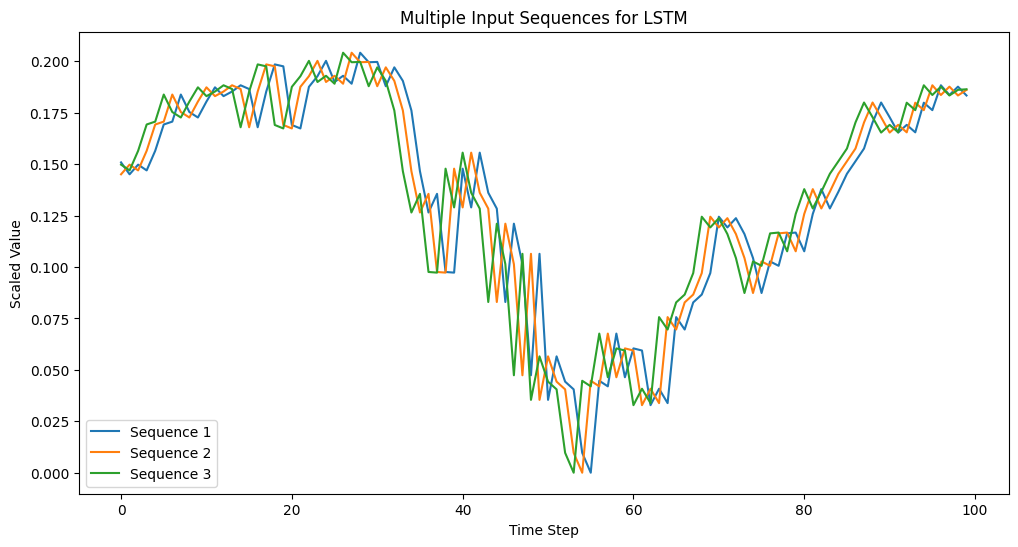

In [ ]:
plt.figure(figsize=(12, 6))

for i in range(3):  # Visualize first 3 sequences
    plt.plot(X_train[i].flatten(), label=f'Sequence {i+1}')

plt.title('Multiple Input Sequences for LSTM')
plt.xlabel('Time Step')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()


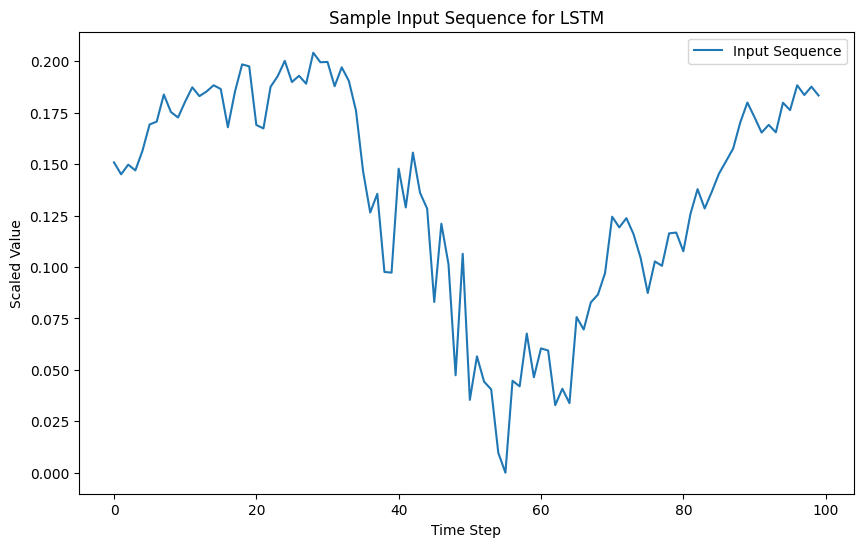

In [ ]:
import matplotlib.pyplot as plt

# Visualize the first input sequence from the training data
sample_index = 0  # You can change this to visualize different sequences

plt.figure(figsize=(10, 6))
plt.plot(X_train[sample_index].flatten(), label='Input Sequence')
plt.title('Sample Input Sequence for LSTM')
plt.xlabel('Time Step')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()
